#### AOS 575 - PDFs - Lecture, 9/16/2020
Originally coded by Prof. Barnes (CSU) <br>
updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU) for ATOC7500 - central_limit_theorem - Lecture #2, Last updated January 10, 2019<br>
updated by Prof. Maroon (UWisc) for AOS 575. <br>
Last updated: 9/8/2020

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  #importing the stats subpackage from scipy
import pandas as pd  

(-8.0, 8.0)

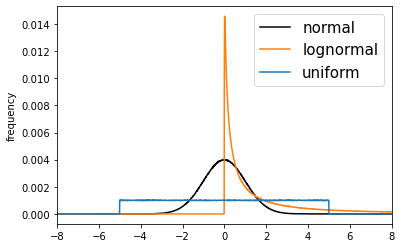

In [2]:
### Plot Different Types of Distributions - Normal, Lognormal, Uniform
N0 = 10000000  #Pick a very large number. What happens when you vary it? 
xinc = np.arange(-10,10,.01)
Rblack = np.random.normal(0,1,size=(N0,))
Rorange= np.random.lognormal(0.,2.,size=(N0,))
Rblue = np.random.uniform(-5.,5.,size=(N0,))

hx = np.histogram(Rblack,xinc)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='k',label='normal')
hx = np.histogram(Rorange,xinc)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='C1',label='lognormal')   #looks like rainfall doesn't it?
hx = np.histogram(Rblue,xinc)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='C0',label='uniform') 

plt.legend(fontsize = 15)
plt.ylabel('frequency')
plt.xlim(-8,8)


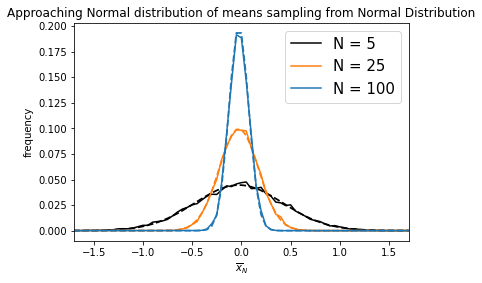

In [3]:
### 1. Test Central Limit Theorem with a ***Normal Distribution***
### Compare Monte Carlo selection of normal distribution (solid) with z-statistics calculation (dashed) for increasing N.
### Distribution should narrow and approach 0 as N increases - Showing the central limit theorem.
### In other words -- as the sample gets large enough you can use the normally distributed z-statistic to estimate
### probabilities of getting that mean.
bin_width = .05
for N in (5, 25, 100):
    y2 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'C1'
    elif(N==100):
        clr = 'C0'            
    for i in np.arange(0,10000):    ### This is the Monte Carlo step
        y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))            
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y2hist, x = np.histogram(y2,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y2hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)
    #the scale option scales the standard deviation from 1 (standard normal deviation) to a standard deviation of your choice
    
    
plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,2,.5))
plt.xlim(-1.7,1.7)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')
plt.legend(fontsize = 15)
plt.title('Approaching Normal distribution of means sampling from Normal Distribution')
plt.show()

#Note how for normally distribute data, the means are also (dashed and solid lines are almost indistinguishable)

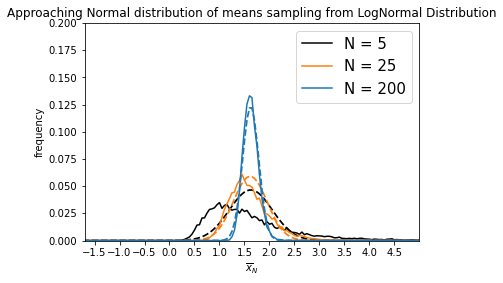

In [4]:
### 2. Test Central Limit Theorem with a ***LogNormal Distribution***
### Plot Standard Log-Normal Distribution of Means for an increasing number of samples N
### Compare monte carlo selection (solid) with z-statistics statistics calculation (dashed)
bin_width = .05
for N in (5, 25, 200):
    y3 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'C1'
    elif(N==200):
        clr = 'C0'            
    for i in np.arange(0,10000):    
        y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))          
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y3hist, x = np.histogram(y3,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y3hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)

plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,5,.5))
plt.xlim(-1.7,5)
plt.ylim(0,0.2)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')
plt.legend(fontsize = 15)
plt.title('Approaching Normal distribution of means sampling from LogNormal Distribution')
plt.show()

#For lognormal distribution, for small sample size, the distribution of means deviates from the normal distribution,
#But once you have sufficient sample (represented here by N=200), the distribution of means is close enough to normal.

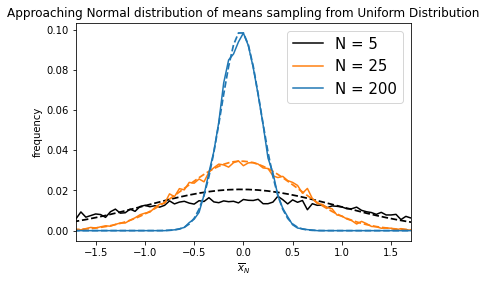

In [5]:
### 3. Test Central Limit Theorem with a ***Uniform Distribution***
### Plot Standard Uniform Distribution of Means for an increasing number of samples N
### Compare monte carlo selection (solid) with z-statistics statistics calculation (dashed)
bin_width = .05
for N in (5, 25, 200):
    y4 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'C1'
    elif(N==200):
        clr = 'C0'            
    for i in np.arange(0,10000):    
        y4.append(np.mean(np.random.uniform(-5.,5.,size=(N,))))            
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y4hist, x = np.histogram(y4,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y4hist/(float(len(y4))), color = clr, label = 'N = ' + str(N))
    sigma_y4 = np.std(np.random.uniform(-5.,5.,size=(N,)))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = sigma_y4/np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)
    #the scale option scales the standard deviation from 1 (standard normal deviation) to a standard deviation of your choice
    
    
plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,2,.5))
plt.xlim(-1.7,1.7)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')
plt.legend(fontsize = 15)
plt.title('Approaching Normal distribution of means sampling from Uniform Distribution')
plt.show()


<b>The Central Limit Theorem is powerful: Regardless of an underlying distribution, the distribution of means (given large enough sample size) is NORMAL! This means that we can do statistical tests on the means using normal distributions!</b>